## 0. What We Are Going To Do:
We are going to classify images of handwritten digits (MNIST dataset) using a fully-connected neural network.

![MLNN](img/mlp.png)

After successful training, our model will be able to guess the digit in the image.

IMPORTANT NOTE: Some part of the code is already completed. Do not delete them!

** In this section we import all the packages you need(You may edit & rerun this part later)**

Note: You can also import classes/functions within a package directly (e.g. from keras.layers import Dense).


In [1]:
import keras
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.models import load_model

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\deeplearning\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 1. Prepare Data:

The dataset is loaded in this section. 

**1-0. Check the dimensions of data and its minimum & maximum.**

Note: You should paste the dataset file in '~/.keras/datasets/' directory or it will start downloading it.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('train data dim:', x_train.shape)
# Print x_test and y_test dimensions
print('test data dim:', x_test.shape)
print('test label dim:', y_test.shape)
# Question: How many train/test samples does it have?
print('train size : {}\n test size: {}'.format(x_train.shape[0],x_test.shape[0]))
# Print the minimum and maximum of x_train and x_test(use numpy min and max functions)
print('minimum of x_train: {}\nmaximum of x_train : {}'.format(np.min(x_train),np.max(x_train)))
print('minimum of x_test: {}\nmaximum of x_test : {}'.format(np.min(x_test),np.max(x_test)))

train data dim: (60000, 28, 28)
test data dim: (10000, 28, 28)
test label dim: (10000,)
train size : 60000
 test size: 10000
minimum of x_train: 0
maximum of x_train : 255
minimum of x_test: 0
maximum of x_test : 255


** 1-1. Check a random sample of train data and its label. **

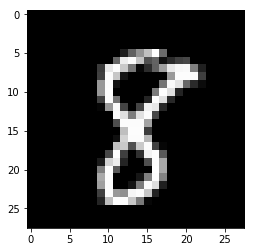

In [4]:
# generate a random number. (use numpy random.randint)
rand_num = np.random.randint(x_train.shape[0])
# plot using plt.imshow() & plt.show()
plt.imshow(x_train[rand_num],cmap='gray')
plt.show()
# print its label


**1-2. Our Network accept 1D data. So we should flatten our 2D image, then print the dimension of the result arrays.**

Use numpy reshape function.


In [5]:
# Reshape x_train and x_test using numpy reshape function
input_shape = x_train.shape[1]*x_train.shape[2]
p_x_train = x_train.reshape((-1,input_shape))
p_x_test = x_test.reshape((-1,input_shape))

In [6]:
input_shape

784

** 1-3. Normalize data by rescaling them to (0,1) **

In [7]:
# normalize x_train and x_test by dividing them by max of x_train:
p_x_train = p_x_train/np.max(p_x_train)
p_x_test = p_x_test/np.max(p_x_train)

** 1-4. Convert label arrays to 1-hot representation **

In [8]:
# Use keras.utils.to_categorical
p_y_train = keras.utils.to_categorical(y_train,10)
p_y_test = keras.utils.to_categorical(y_test,10)
output_shape = p_y_test.shape[1]

1


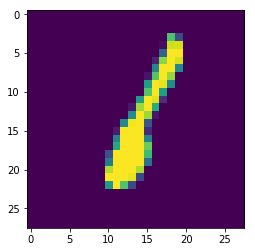

In [9]:
rand_num = np.random.randint(p_x_train.shape[0])
plt.imshow(p_x_train.reshape((-1,28,28))[rand_num])
print(np.argmax(p_y_train[rand_num]))

## 2. Define Model

** 2-0. Add the following layers to the network:**
* Hidden Layer 1: Fully Conncted + Relu Activition (e.g. 512 Nuerons)
* Hidden Layer 2: Fully Connected + Relu Activition (e.g. 512 Neurons)
* Outout Layer: Fully Connected + Softmax Activition

In [10]:
model = Sequential()
# Add the layers to model here.
# Hidden Layer1: 512 Neurons+ relu activation + Normal Initialization mean=0, std = 0.1(RandomNormal). You Should define input shape for layer1
model.add(Dense(512,activation='relu',input_shape=(input_shape,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.1)))
# Hidden Layer2: 512 Neurons+ relu activation + Normal Initialization mean=0, std = 0.1(RandomNormal).
model.add(Dense(512,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1)))
# Output Layer1: Question: How many neurons?what kind of activation function? + Normal Initialization mean=0, std = 0.1(RandomNormal).
model.add(Dense(output_shape, activation='softmax',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1)))

** 2-1. Determine loss function, optimizer and metrics for the model **

In [11]:
# define the optimizer and its learning rate
sgd = SGD(lr=0.01)
# Use categorical_crossentropy as loss function, and accuracy as one of the metrics (you may add other metrics too). 
# use model.compile to add the above parameters to the model
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

** 2-2. Print the review of the model **

In [12]:
model.summary()
# Here we saved the raw model without any training. we will use it later.
model.save('raw_model.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## 3. Train And Evaluate Model. 

** 3-0. Train model on training data using model.fit for 3 epoch**

3


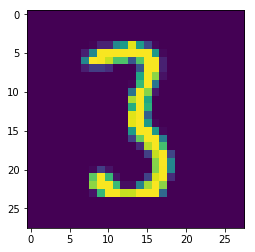

In [13]:
rand_num = np.random.randint(p_x_train.shape[0])
plt.imshow(p_x_train.reshape((-1,28,28))[rand_num])
print(np.argmax(p_y_train[rand_num]))

In [14]:
np.min(p_y_train)

0.0

In [15]:
p_y_train.shape

(60000, 10)

In [16]:
# Use model.fit to train the model. Following hyperparameters are suggested (but you may change them if you want):
# batch_size = 32
# epochs = 3
# Validation data percentage: 20%
# use verbose for logging the training
model.fit(x=p_x_train,y=p_y_train,batch_size=32,epochs=3,validation_split=.2,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 6s 128us/step - loss: 0.4127 - acc: 0.8775 - val_loss: 0.2544 - val_acc: 0.9243
Epoch 2/3
48000/48000 [==============================] - 6s 132us/step - loss: 0.2137 - acc: 0.9374 - val_loss: 0.1918 - val_acc: 0.9452
Epoch 3/3
48000/48000 [==============================] - 6s 124us/step - loss: 0.1646 - acc: 0.9522 - val_loss: 0.1715 - val_acc: 0.9494


** 3-1. Evaluate model on test data using model.evaluate. Print the model accuracy on test set. **

In [17]:
model.evaluate(p_x_test,p_y_test)

10000/10000 [==============================] - 0s 42us/step


[0.7695954777777398, 0.9512]

** 3-2. Save model **

In Keras, you can save the model to a HDF5 file(.h5) and reload it later simply by model.save(filepath) and keras.models.load_model(filepath), respectively.

The saved model contains:
* the architecture of the model, allowing to re-create the model
* the weights of the model
* the training configuration (loss, optimizer)
* the state of the optimizer, allowing to resume training exactly where you left off.


In [18]:
# save model here:
model.save('mlp.h5')
# Delete model to make sure you reload it correctly:
del model

In [19]:
p_x_train[np.random.randint(p_x_train.shape[0])].shape

(784,)

** 3-3. Load model and Predict label for a random image in train set. Verify predicted label by ploting the image. **

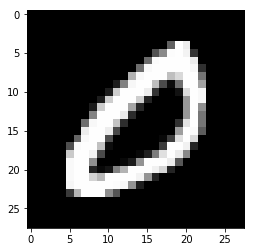

0


In [20]:
# reload the model here:
model = load_model('mlp.h5')
# generate a random number. (use numpy random.randint) and use model.predict to predict its label. 
rand_num = np.random.randint(p_x_train.shape[0])
predicted = model.predict(p_x_train[rand_num].reshape((1,-1)))
# print its label
plt.imshow(x_train[rand_num],cmap='gray')
plt.show()
print(np.argmax(predicted))

** 3-4. Continue training + Callbacks **

Please Examine how these callbacks work. you may add other callbacks to this list.

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 6s 123us/step - loss: 0.1357 - acc: 0.9612 - val_loss: 0.1493 - val_acc: 0.9567
Epoch 2/100
48000/48000 [==============================] - 6s 122us/step - loss: 0.1158 - acc: 0.9664 - val_loss: 0.1394 - val_acc: 0.9587
Epoch 3/100
48000/48000 [==============================] - 6s 122us/step - loss: 0.0997 - acc: 0.9713 - val_loss: 0.1310 - val_acc: 0.9623
Epoch 00003: early stopping


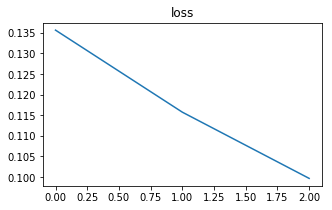

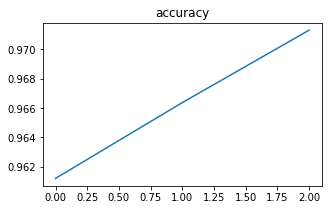

In [21]:
# We will use two callbacks here: EarlyStopping, CSVLogger (you may add other callbacks to this list)
callback = [keras.callbacks.EarlyStopping(monitor='val_acc', verbose=1, min_delta=0.01, patience = 2, mode = 'max'),
            keras.callbacks.CSVLogger('log.csv')]
history = model.fit(p_x_train, p_y_train,
                    batch_size = 32,
                    epochs = 100,
                    verbose = 1,
                    validation_split = 0.2,
                    callbacks = callback)

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy');

## 4. Extras

** 4-0. Initialization is important! **

Redefine Network, this time use mean=0 and std=1 for initialization.

Then Try to fit the model.

Repeat this with other initialization methods and parameters.

In [22]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(input_shape,),kernel_initializer=RandomNormal(mean=0.0, stddev=.1)))
model.add(Dense(512,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=.1)))
model.add(Dense(output_shape, activation='softmax',kernel_initializer=RandomNormal(mean=0.0, stddev=.1)))
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x=p_x_train,y=p_y_train,batch_size=32,epochs=3,validation_split=.2,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 6s 133us/step - loss: 0.4156 - acc: 0.8754 - val_loss: 0.2357 - val_acc: 0.9315
Epoch 2/3
48000/48000 [==============================] - 6s 128us/step - loss: 0.2140 - acc: 0.9385 - val_loss: 0.1879 - val_acc: 0.9457
Epoch 3/3
48000/48000 [==============================] - 6s 127us/step - loss: 0.1664 - acc: 0.9520 - val_loss: 0.1614 - val_acc: 0.9533


** 4-1. Overfitting/Underfitting **

Load the 'raw_model.h5' and this time use 1 percent of training data for training, and all test data for validation.


In [25]:
del model
# Load model here and fit it with less data
model = load_model('raw_model.h5')
percentage = int(p_x_train.shape[0] * .01)
print(percentage)
model.fit(x=p_x_train[:percentage ,],y=p_y_train[:percentage],batch_size=32,epochs=3,validation_data=(p_x_test,p_y_test),verbose=1)

600
Train on 600 samples, validate on 10000 samples
Epoch 1/3
600/600 [==============================] - 1s 1ms/step - loss: 2.3407 - acc: 0.2900 - val_loss: 8.5342 - val_acc: 0.4638
Epoch 2/3
600/600 [==============================] - 0s 703us/step - loss: 1.1128 - acc: 0.6600 - val_loss: 5.9604 - val_acc: 0.6229
Epoch 3/3
600/600 [==============================] - 0s 721us/step - loss: 0.7775 - acc: 0.7633 - val_loss: 4.9367 - val_acc: 0.6881


Now create another fully-connected model with 1 hidden layer(5 Neurons). Use all training data for training this model. (10 Training epoch)

Observe the result.

In [26]:
model = Sequential()
model.add(Dense(5,activation='relu',input_shape=(input_shape,),kernel_initializer=RandomNormal(mean=0.0, stddev=.01)))
model.add(Dense(output_shape, activation='softmax',kernel_initializer=RandomNormal(mean=0.0, stddev=.1)))
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
model.fit(x=p_x_train,y=p_y_train,batch_size=32,epochs=10,validation_data=(p_x_test,p_y_test),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 102us/step - loss: 1.4171 - acc: 0.5201 - val_loss: 3.3416 - val_acc: 0.7851
Epoch 2/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.6246 - acc: 0.8108 - val_loss: 2.6006 - val_acc: 0.8355
Epoch 3/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.5151 - acc: 0.8502 - val_loss: 2.3457 - val_acc: 0.8514
Epoch 4/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.4687 - acc: 0.8662 - val_loss: 1.9995 - val_acc: 0.8735
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.4431 - acc: 0.8748 - val_loss: 1.9781 - val_acc: 0.8751
Epoch 6/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.4263 - acc: 0.8800 - val_loss: 1.9840 - val_acc: 0.8749
Epoch 7/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.4143 - acc: 0.8831 - val_loss: 2.0214 - val_ac